Importing Libraries

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import pandas as pd

from skfuzzy import control as ctrl

Load & Data Pre-processing

In [2]:
df = pd.read_csv('netflix-dataset.csv')
df

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,American Beauty,movie,Drama,1999.0,tt0169547,8.3,1239809.0,NaN
1,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,522203.0,NaN
2,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1237141.0,NaN
3,Jarhead,movie,"Biography, Drama, War",2005.0,tt0418763,7.0,213771.0,NaN
4,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,449123.0,NaN
...,...,...,...,...,...,...,...,...
20813,American Manhunt: O.J. Simpson,tv,Documentary,2025.0,tt35456246,7.5,1816.0,NaN
20814,Devil's Diner,tv,"Drama, Horror",2025.0,tt35557166,7.1,393.0,NaN
20815,NaN,tv,NaN,NaN,NaN,NaN,NaN,NaN
20816,NaN,tv,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# new_df = df[df.isnull().any(axis=1)]

# print(new_df.isnull().sum())

In [4]:
# Check Movies Only Type

# print(df['type'].value_counts())
# print('\n')

# df_movies = df.loc[df['type'] == 'movie']
# df_movies

In [5]:
# Drop the 'imdbId' column as it is not needed
df_cleaned = df.drop(columns=['availableCountries', 'imdbId'])

# Drop rows with missing values
df_cleaned = df_cleaned.dropna()

df_cleaned

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes
0,American Beauty,movie,Drama,1999.0,8.3,1239809.0
1,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6,522203.0
2,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,8.2,1237141.0
3,Jarhead,movie,"Biography, Drama, War",2005.0,7.0,213771.0
4,Unforgiven,movie,"Drama, Western",1992.0,8.2,449123.0
...,...,...,...,...,...,...
20808,The Quintessential Quintuplets Specials,tv,"Animation, Comedy, Drama",2023.0,7.8,131.0
20811,Surviving Black Hawk Down,tv,"Documentary, History, War",2025.0,7.5,837.0
20812,Ms. Rachel,tv,Family,2025.0,8.2,27.0
20813,American Manhunt: O.J. Simpson,tv,Documentary,2025.0,7.5,1816.0


In [6]:
# Save the cleaned data
df_cleaned.to_csv('top-movies-cleaned.csv', index=False)

print('Dataset cleaned and saved to top-movies-cleaned.csv')

Dataset cleaned and saved to top-movies-cleaned.csv


Loading the Dataset

In [7]:
data = pd.read_csv('top-movies-cleaned.csv')
data

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes
0,American Beauty,movie,Drama,1999.0,8.3,1239809.0
1,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6,522203.0
2,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,8.2,1237141.0
3,Jarhead,movie,"Biography, Drama, War",2005.0,7.0,213771.0
4,Unforgiven,movie,"Drama, Western",1992.0,8.2,449123.0
...,...,...,...,...,...,...
19092,The Quintessential Quintuplets Specials,tv,"Animation, Comedy, Drama",2023.0,7.8,131.0
19093,Surviving Black Hawk Down,tv,"Documentary, History, War",2025.0,7.5,837.0
19094,Ms. Rachel,tv,Family,2025.0,8.2,27.0
19095,American Manhunt: O.J. Simpson,tv,Documentary,2025.0,7.5,1816.0


Defining Fuzzy Variables

In [8]:
# Determine the data ranges
max_year = data['releaseYear'].max()
min_year = data['releaseYear'].min()

max_imdb_Votes = data['imdbNumVotes'].max()
min_imdb_Votes = data['imdbNumVotes'].min()


print('data release Year tertinggi :', max_year, 'terendah :', min_year)
print('data imdb Votes tertinggi :', max_imdb_Votes, 'terendah :', min_imdb_Votes)
print('\n')
print(f"Release Year Range: {min_year} - {max_year}")
print(f"Number of Votes Range: {min_imdb_Votes} - {max_imdb_Votes}")

data release Year tertinggi : 2025.0 terendah : 1913.0
data imdb Votes tertinggi : 3005069.0 terendah : 5.0


Release Year Range: 1913.0 - 2025.0
Number of Votes Range: 5.0 - 3005069.0


Defining the Universes

In [9]:
# Define the universal variables
imdb_rating = ctrl.Antecedent(np.arange(0, 10, 0.1), 'imdb_rating')
release_year = ctrl.Antecedent(np.arange(min_year, max_year + 1, 1), 'release_year')
num_votes = ctrl.Antecedent(np.arange(0, max_imdb_Votes + 1, 10000), 'num_votes')

movie_quality = ctrl.Consequent(np.arange(0, 11, 1), 'movie_quality')

Designing & Visualizing Membership Functions

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


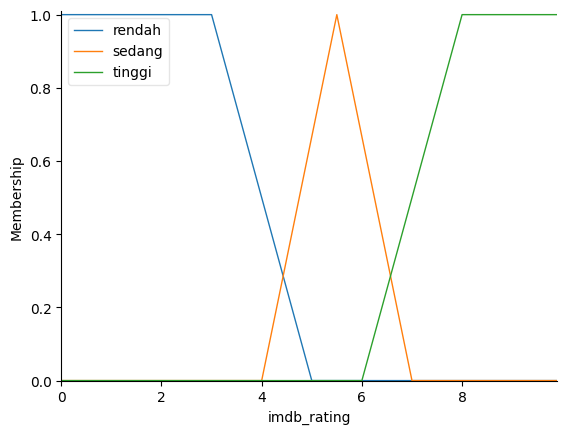

In [10]:
imdb_rating['rendah'] = fuzz.trapmf(imdb_rating.universe, [0,0, 3, 5])
imdb_rating['sedang'] = fuzz.trimf(imdb_rating.universe, [4, 5.5, 7])
imdb_rating['tinggi'] = fuzz.trapmf(imdb_rating.universe, [6, 8, 10, 10])

imdb_rating.view()

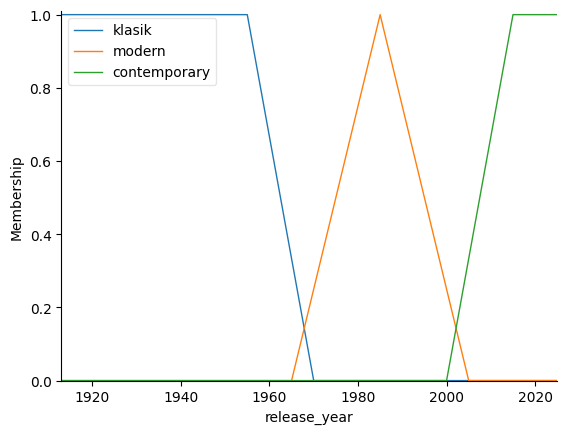

In [11]:
release_year['klasik'] = fuzz.trapmf(release_year.universe, [min_year, min_year, 1955, 1970])
release_year['modern'] = fuzz.trimf(release_year.universe, [1965, 1985, 2005])
release_year['contemporary'] = fuzz.trapmf(release_year.universe, [2000, 2015, max_year, max_year])

release_year.view()

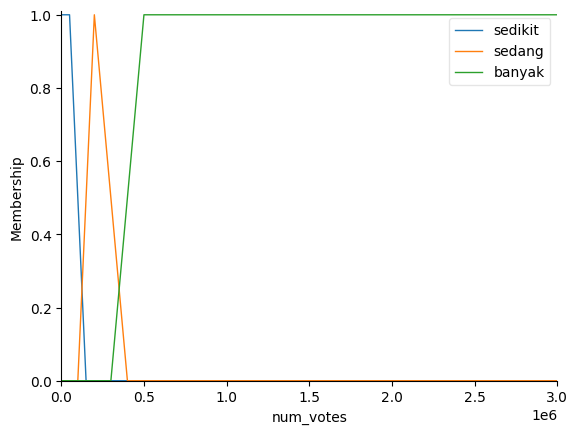

In [12]:
num_votes['sedikit'] = fuzz.trapmf(num_votes.universe, [0, 0, 50000, 150000])
num_votes['sedang'] = fuzz.trimf(num_votes.universe, [100000, 200000, 400000])
num_votes['banyak'] = fuzz.trapmf(
    num_votes.universe, [300000, 500000, max_imdb_Votes, max_imdb_Votes])

num_votes.view()

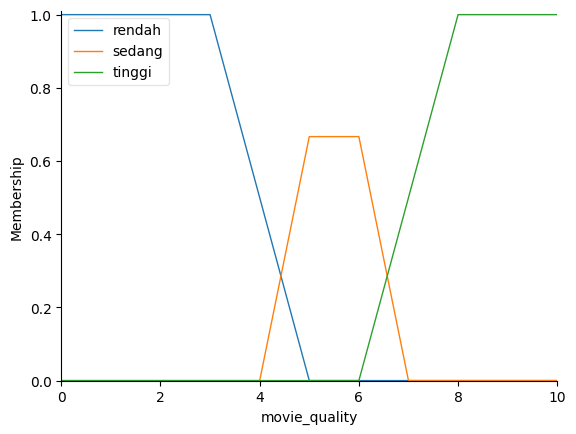

In [13]:
movie_quality['rendah'] = fuzz.trapmf(movie_quality.universe, [0, 0, 3, 5])
movie_quality['sedang'] = fuzz.trimf(movie_quality.universe, [4, 5.5, 7])
movie_quality['tinggi'] = fuzz.trapmf(movie_quality.universe, [6, 8, 10, 10])

movie_quality.view()

Constructing Fuzzy Logic Rules

In [14]:
# Constructing Fuzzy Logic Rules¶
# We construct the following fuzzy logic rules based on domain expertise:
        
# Rule 1: IF the IMDb Rating is High AND the Number of Votes is Many, THEN the Movie Quality is High.
# Rule 2: IF the IMDb Rating is Medium AND the Number of Votes is Average, THEN the Movie Quality is Medium.
# Rule 3: IF the IMDb Rating is Low AND the Number of Votes is Few, THEN the Movie Quality is Low.
# Rule 4: IF the IMDb Rating is High AND the Release Year is Classic, THEN the Movie Quality is High.
# Rule 5: IF the IMDb Rating is Medium AND the Release Year is Modern, THEN the Movie Quality is Medium.
# Rule 6: IF the IMDb Rating is Low OR the Number of Votes is Few, THEN the Movie Quality is Low.
# Rule 7: IF the IMDb Rating is High, THEN the Movie Quality is High.
# Rule 8: IF the IMDb Rating is Medium, THEN the Movie Quality is Medium.
# Rule 9: IF the IMDb Rating is Low, THEN the Movie Quality is Low.

#  Rule definitions
rule1 = ctrl.Rule(imdb_rating['tinggi'] & num_votes['banyak'], movie_quality['tinggi'])
rule2 = ctrl.Rule(imdb_rating['sedang'] & num_votes['sedang'], movie_quality['sedang'])
rule3 = ctrl.Rule(imdb_rating['rendah'] & num_votes['sedikit'], movie_quality['rendah'])
rule4 = ctrl.Rule(imdb_rating['tinggi'] & release_year['klasik'], movie_quality['tinggi'])
rule5 = ctrl.Rule(imdb_rating['sedang'] & release_year['modern'], movie_quality['sedang'])
rule6 = ctrl.Rule(imdb_rating['rendah'] | num_votes['sedikit'], movie_quality['rendah'])
rule7 = ctrl.Rule(imdb_rating['tinggi'], movie_quality['tinggi'])
rule8 = ctrl.Rule(imdb_rating['sedang'], movie_quality['sedang'])
rule9 = ctrl.Rule(imdb_rating['rendah'], movie_quality['rendah'])

Building the Control System

In [15]:
# Build the control system with all the rules
movie_quality_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9
])

Applying the Fuzzy Model to the Dataset

In [16]:
def compute_movie_quality(row):
        movie_quality_simulation = ctrl.ControlSystemSimulation(movie_quality_ctrl)
        
        imdb_rating_value = None
        release_year_value = None
        num_votes_value = None
        
        try:
                imdb_rating_value = row['imdbAverageRating']
                release_year_value = row['releaseYear']
                num_votes_value = row['imdbNumVotes']
                
                imdb_rating_value = np.clip(imdb_rating_value, imdb_rating.universe[0], imdb_rating.universe[-1])
                release_year_value = np.clip(release_year_value, release_year.universe[0], release_year.universe[-1])
                num_votes_value = np.clip(num_votes_value, num_votes.universe[0], num_votes.universe[-1])
                
                movie_quality_simulation.input['imdb_rating'] = imdb_rating_value
                movie_quality_simulation.input['release_year'] = release_year_value
                movie_quality_simulation.input['num_votes'] = num_votes_value
                
                movie_quality_simulation.compute()
                
                return movie_quality_simulation.output['movie_quality']
        
        except Exception as ex:
                print(f"error computing for row {row.name} : {ex}")
                print(f"Inputs: Imdb Rating: {imdb_rating_value}, Release Year: {release_year_value}, Number of Votes: {num_votes_value}")
                
                return np.nan

data['movie_quality_score'] = data.apply(compute_movie_quality, axis=1)

In [17]:
data.head(None)

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,movie_quality_score
0,American Beauty,movie,Drama,1999.0,8.3,1239809.0,8.444444
1,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6,522203.0,8.366667
2,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,8.2,1237141.0,8.444444
3,Jarhead,movie,"Biography, Drama, War",2005.0,7.0,213771.0,8.238095
4,Unforgiven,movie,"Drama, Western",1992.0,8.2,449123.0,8.444444
...,...,...,...,...,...,...,...
19092,The Quintessential Quintuplets Specials,tv,"Animation, Comedy, Drama",2023.0,7.8,131.0,4.656946
19093,Surviving Black Hawk Down,tv,"Documentary, History, War",2025.0,7.5,837.0,4.428803
19094,Ms. Rachel,tv,Family,2025.0,8.2,27.0,4.785714
19095,American Manhunt: O.J. Simpson,tv,Documentary,2025.0,7.5,1816.0,4.428803


Classification of Movies

In [49]:
def clasify_movie_score(score):
        if score >= 7:
                return 'Bagus'
        elif score >= 5:
                return 'Sedang'
        else:
                return 'Kurang Bagus'
        
data['movie_quality_category'] = data['movie_quality_score'].apply(clasify_movie_score)

In [50]:
data.head(None)

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,movie_quality_score,movie_quality_category
0,American Beauty,movie,Drama,1999.0,8.3,1239809.0,8.444444,Bagus
1,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6,522203.0,8.366667,Bagus
2,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,8.2,1237141.0,8.444444,Bagus
3,Jarhead,movie,"Biography, Drama, War",2005.0,7.0,213771.0,8.238095,Bagus
4,Unforgiven,movie,"Drama, Western",1992.0,8.2,449123.0,8.444444,Bagus
...,...,...,...,...,...,...,...,...
19092,The Quintessential Quintuplets Specials,tv,"Animation, Comedy, Drama",2023.0,7.8,131.0,4.656946,Kurang Bagus
19093,Surviving Black Hawk Down,tv,"Documentary, History, War",2025.0,7.5,837.0,4.428803,Kurang Bagus
19094,Ms. Rachel,tv,Family,2025.0,8.2,27.0,4.785714,Kurang Bagus
19095,American Manhunt: O.J. Simpson,tv,Documentary,2025.0,7.5,1816.0,4.428803,Kurang Bagus


Visualizing the Movie Quality Distribution

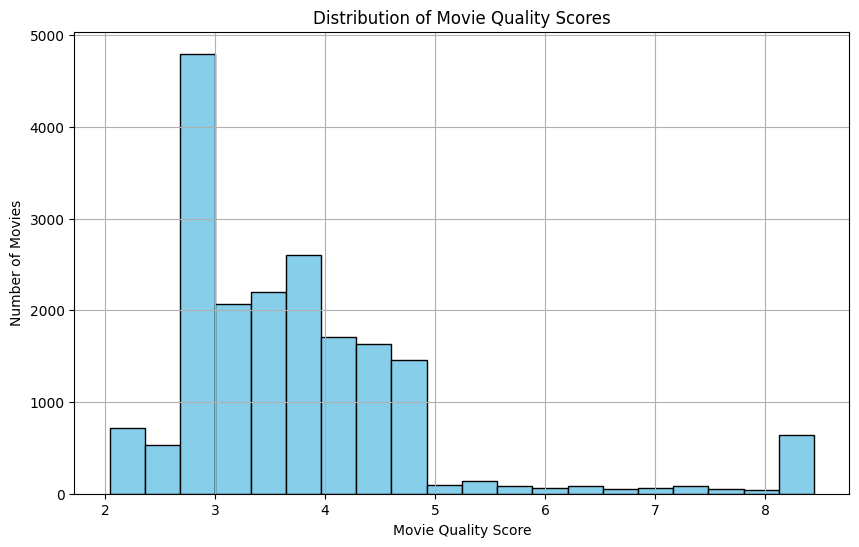

In [51]:
plt.figure(figsize=(10, 6))
plt.hist(data['movie_quality_score'].dropna(),
         bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Quality Scores')
plt.xlabel('Movie Quality Score')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

Clasification Accuracy

Movie Quality Category Counts:
movie_quality_category
Kurang Bagus    17732
Bagus             816
Sedang            549
Name: count, dtype: int64


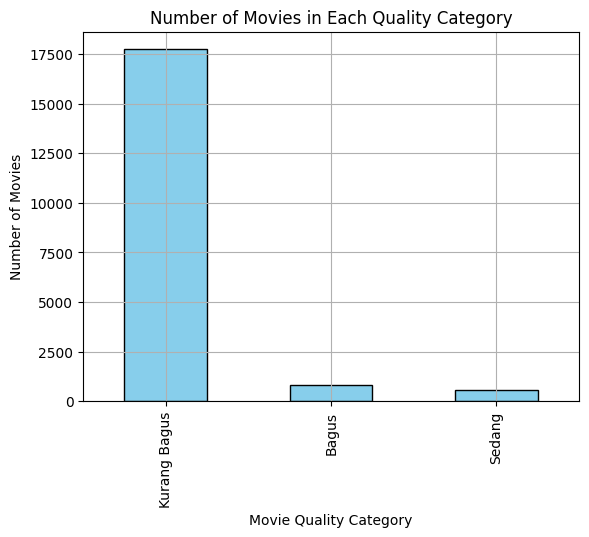

In [52]:
# Count the number of movies in each category
category_counts = data['movie_quality_category'].value_counts()
print("Movie Quality Category Counts:")
print(category_counts)

# Plot the counts
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Movies in Each Quality Category')
plt.xlabel('Movie Quality Category')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

In [59]:
high_rating_movies = data[data['movie_quality_category'] == 'Bagus']

print("Movies with Good Quality :")
high_rating_movies

Movies with Good Quality :


,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,movie_quality_score,movie_quality_category
0,American Beauty,movie,Drama,1999.0,8.3,1239809.0,8.444444,Bagus
1,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6,522203.0,8.366667,Bagus
2,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,8.2,1237141.0,8.444444,Bagus
3,Jarhead,movie,"Biography, Drama, War",2005.0,7.0,213771.0,8.238095,Bagus
4,Unforgiven,movie,"Drama, Western",1992.0,8.2,449123.0,8.444444,Bagus
...,...,...,...,...,...,...,...,...
17136,3 Body Problem,tv,"Adventure, Drama, Fantasy",2024.0,7.5,157755.0,8.346154,Bagus
17183,One Piece,tv,"Action, Adventure, Comedy",2023.0,8.3,168998.0,8.444444,Bagus
17830,Beef,tv,"Comedy, Drama",2023.0,8.0,148331.0,8.283863,Bagus
18745,The Gentlemen,tv,"Action, Comedy, Crime",2024.0,8.0,155506.0,8.444444,Bagus
